## Import cuxfilter

In [ ]:
import cuxfilter
from bokeh import palettes
from cuxfilter.layouts import *

from bokeh.tile_providers import get_provider as gp
tile_provider = gp('STAMEN_TONER')

In [ ]:
#update data_dir if you have downloaded datasets elsewhere
DATA_DIR = './data'

## Download required datasets

In [ ]:
! curl https://s3.us-east-2.amazonaws.com/rapidsai-data/viz-data/146M_predictions_v2.arrow.gz --create-dirs -o $DATA_DIR/146M_predictions_v2.arrow.gz

In [ ]:
from cuxfilter.sampledata import datasets_check
datasets_check('mortgage', base_dir=DATA_DIR)

## Define charts

In [ ]:
cux_df = cuxfilter.DataFrame.from_arrow(DATA_DIR + '/146M_predictions_v2.arrow')

In [5]:
cux_df.data.head()

,zip,dti,current_actual_upb,borrower_credit_score,loan_id,delinquency_12_prediction,seller_name
0,85.0,43.0,113490.289062,772.0,1.565209e+11,0.186399,30
1,980.0,23.0,127555.281250,772.0,2.668867e+11,0.174487,43
2,206.0,32.0,164793.046875,778.0,5.811654e+11,0.180703,30
3,548.0,27.0,149874.484375,773.0,4.559486e+11,0.184124,30
4,939.0,42.0,222159.046875,800.0,8.630428e+11,0.180727,46


In [ ]:
MAPBOX_API_KEY= "<mapbox-api-key>"
geoJSONSource='https://raw.githubusercontent.com/rapidsai/cuxfilter/GTC-2018-mortgage-visualization/javascript/demos/GTC%20demo/src/data/zip3-ms-rhs-lessprops.json'

In [ ]:
chart0 = cuxfilter.charts.choropleth(
    x='zip',
    
    color_column='delinquency_12_prediction', color_aggregate_fn='mean',
    
    elevation_column='current_actual_upb', elevation_factor=0.00001, elevation_aggregate_fn='sum', 
    
    geoJSONSource=geoJSONSource,
    
    mapbox_api_key=MAPBOX_API_KEY,
   
    data_points=1000, tooltip=True
)

chart2 = cuxfilter.charts.bar('delinquency_12_prediction',data_points=50)
chart3 = cuxfilter.charts.range_slider('borrower_credit_score',data_points=50)


### Add mappings for chart1

In [ ]:
mapper1 = {}

for val in cux_df.data.dti.unique().to_pandas().tolist():
    mapper1[int(val)] = 'l_'+str(val)

chart1 = cuxfilter.charts.panel_widgets.drop_down('dti', label_map=mapper1)
#also available: panel_widgets.multi_select

## Create a dashboard object

In [ ]:
d = cux_df.dashboard([chart0, chart2], sidebar=[chart1], layout=cuxfilter.layouts.feature_and_base, theme=cuxfilter.themes.dark, title="Mortgage Dashboard")
d.add_charts(sidebar=[chart3])

In [12]:
#View Individual charts - uncomment below line
# chart0.view()

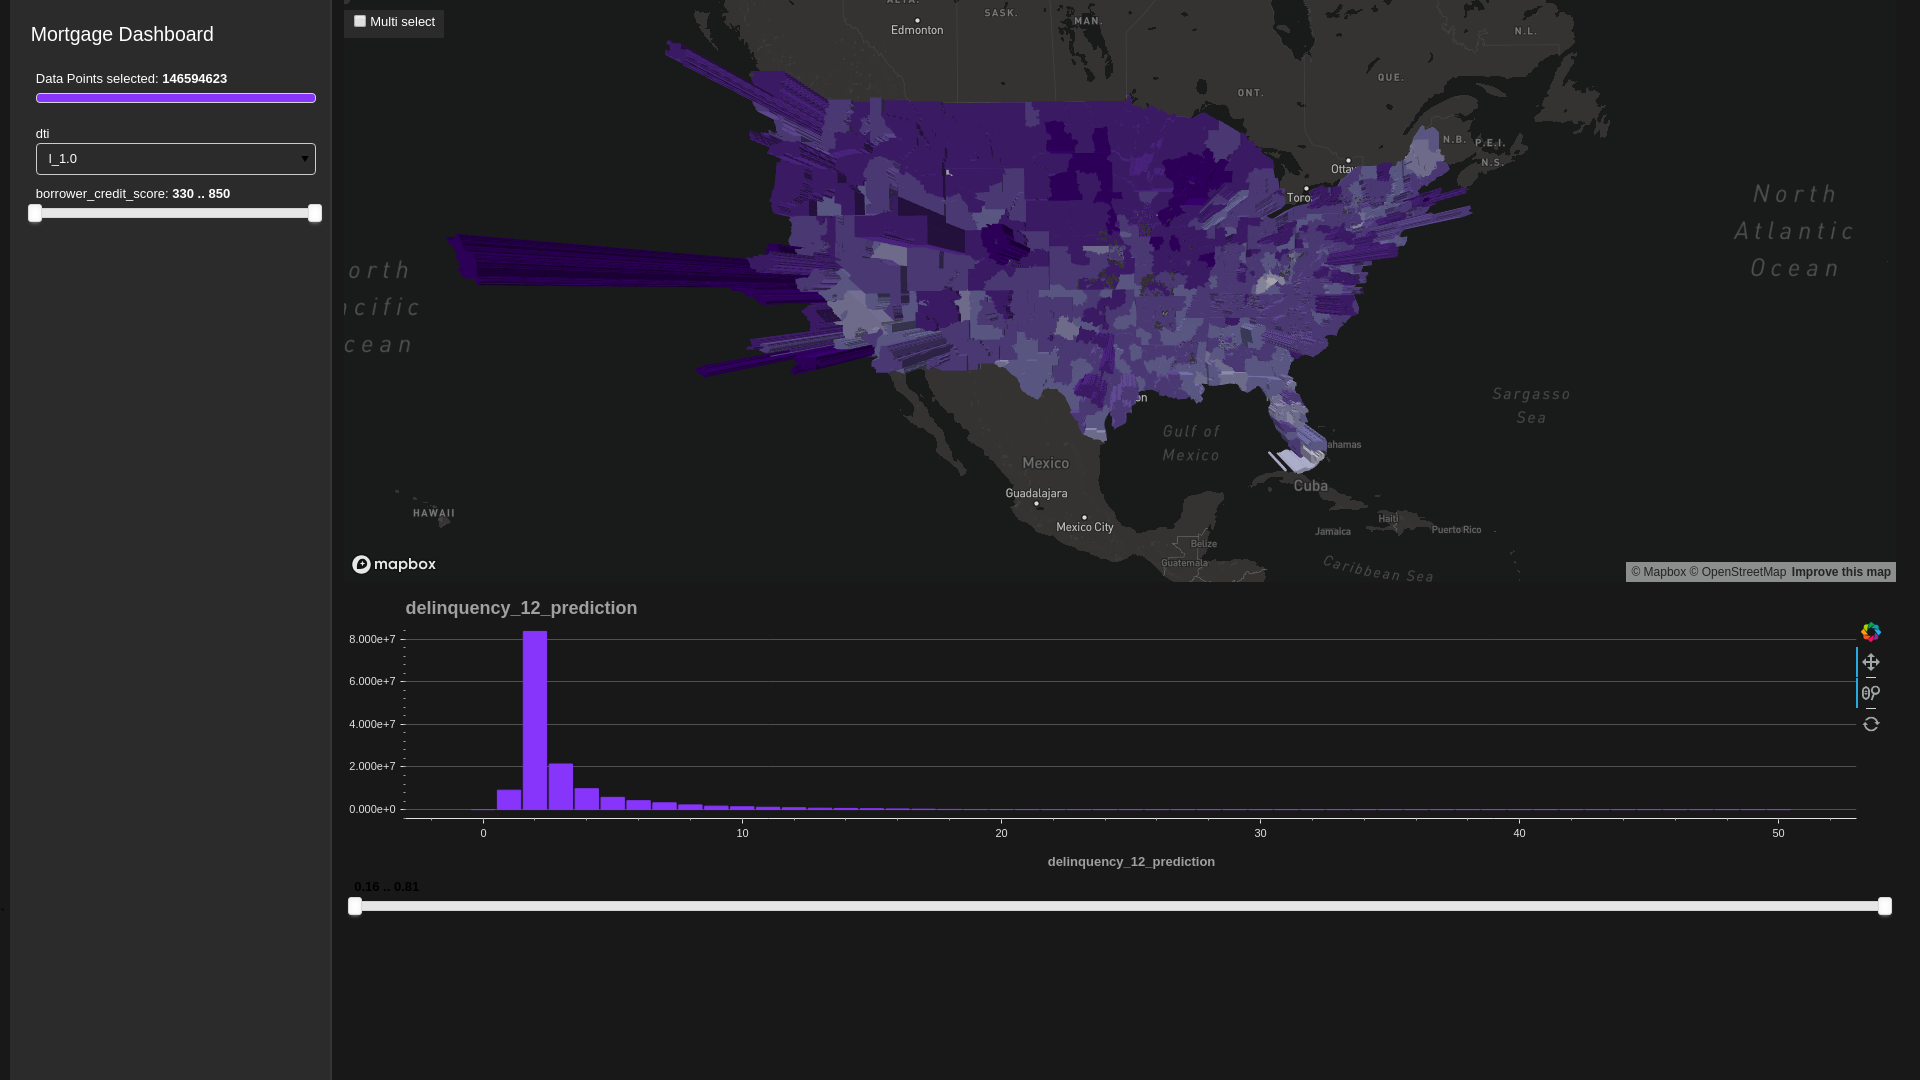

In [15]:
#execute below line for dashboard preview
# await d.preview()

## Starting the dashboard

1. d.show('current_notebook_url:current_notebook_port') remote dashboard

2. d.app() inline within the notebook cell

Incase you need to stop the server:

- d.stop()

In [ ]:
# d.show() # notebook_url="http://localhost:8888"
# d.app() # run the dashboard within the notebook cell

## Export the queried data into a dataframe

In [ ]:
queried_df = d.export()